# Flood mapping

This notebook aims to step through the same process as Stefania's MATLAB code.

In [1]:
import datacube, rasterio, numpy as np, matplotlib.pyplot as plt, xarray, pandas

In [2]:
lat, lon = -27.1544, 149.0677 # surat
lat, lon = -28.034167, 148.581667 # st george

radius = 0.08

## Loading input data

Initial steps are to load the relevant data (and ancilliaries).

In [ ]:
prodcube = datacube.Datacube()

In [3]:
sarcube = datacube.Datacube(config={'db_hostname': 'agdcdev-db.nci.org.au',
                                    'db_port': 6432,
                                    'db_database': 'radar_test'})

In [4]:
wofs_summary = prodcube.load(product='wofs_summary', lat=(lat-radius,lat+radius), lon=(lon-radius,lon+radius))

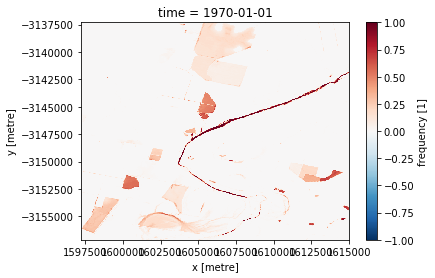

In [5]:
wofs_summary.frequency.plot()

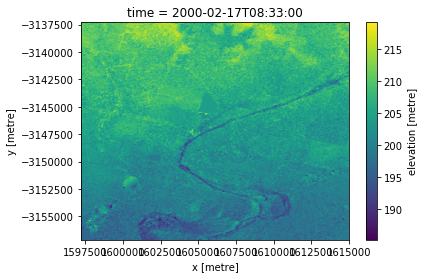

In [6]:
dem = prodcube.load(product='dsm1sv10', like=wofs_summary, time=('1900', '2030'))
dem.elevation.plot()

In [7]:
len(sarcube.find_datasets(product='s1_gamma0_scene', like=wofs_summary, time=('1900', '2030')))

60

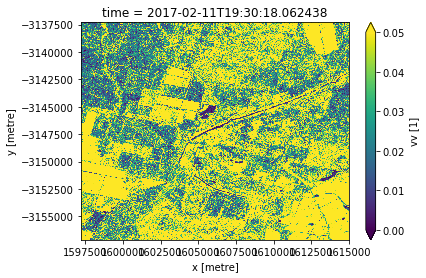

In [22]:
sar = sarcube.load(product='s1_gamma0_scene', like=wofs_summary, time=('2017-02-11', '2017-02-12'), group_by='solar_day')
sar.vv.plot(vmin=0, vmax=0.05)

## Open Water first-pass

The first step chooses a threshold based on a comparison of backscatter statistics, between the areas that are or are not frequently inundated according to the wofs summary.

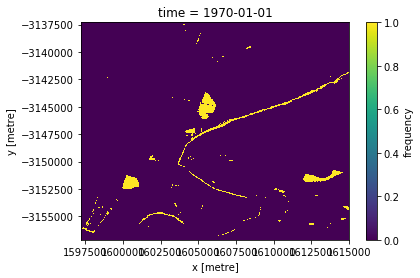

In [8]:
wofs_threshold = 0.3
open_water_expected = wofs_summary.frequency > wofs_threshold
open_water_expected.plot()

(array([1709., 1788., 1021.,  753.,  664.,  563.,  578.,  534.,  540.,
         484.]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 ], dtype=float32),
 <a list of 10 Patch objects>)

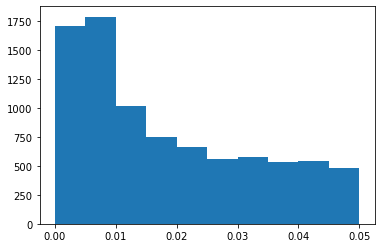

In [28]:
plt.hist(sar.vv.values[open_water_expected.values], range=(0, 0.05))

(array([ 4004., 17286., 32413., 41494., 44573., 43092., 39378., 34923.,
        30524., 26687.]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 ], dtype=float32),
 <a list of 10 Patch objects>)

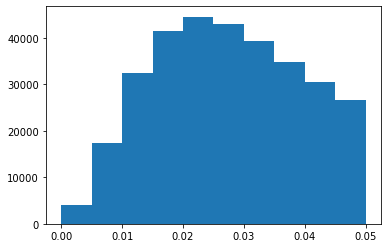

In [29]:
plt.hist(sar.vv.values[~open_water_expected.values], range=(0, 0.05))